# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
# import numpy and pandas
import numpy as np
import pandas as pd

# Challenge 1 - Independent Sample T-tests

In this challenge, we will be using the Pokemon dataset. Before applying statistical methods to this data, let's first examine the data.

Load the data from [here](https://drive.google.com/file/d/1CgaV3QwIw0vJEfANGX0pAjdwQ7mKqePd/view?usp=sharing) store them locally in the provided data folder and run the code below.

In [3]:
# Run this code to load the data
pokemon = pd.read_csv('..\\data\\pokemon.csv')

Let's start off by looking at the `head` function in the cell below.

In [4]:
# Your code here:
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


The first thing we would like to do is compare the legendary Pokemon to the regular Pokemon. To do this, we should examine the data further. What is the count of legendary vs. non legendary Pokemons?

In [5]:
# Your code here:
#Legendary = True
legendary = pokemon['Legendary'].values.sum()
print('The number of legendary pokemons is', legendary)
nonlegendary = (~pokemon['Legendary']).values.sum()
print('The number of non legendary pokemons is', nonlegendary)

The number of legendary pokemons is 65
The number of non legendary pokemons is 735


Compute the mean and standard deviation of the total points for both legendary and non-legendary Pokemon.

In [6]:
# Your code here:
legendary = pokemon.loc[pokemon['Legendary'] == True]
nonlegendary = pokemon.loc[pokemon['Legendary'] == False]

#legendary
legendary_mean = legendary['Total'].mean()
legendary_stddev = legendary['Total'].std()
print('The mean of total points of legendary pokemons is:', legendary_mean)
print('The standard deviation of total points of legendary pokemons is:', legendary_stddev)

#non legendary
nonlegendary_mean = nonlegendary['Total'].mean()
nonlegendary_stddev = nonlegendary['Total'].std()
print('The mean of total points of non legendary pokemons is:', nonlegendary_mean)
print('The standard deviation of total points of non legendary pokemons is:', nonlegendary_stddev)

The mean of total points of legendary pokemons is: 637.3846153846154
The standard deviation of total points of legendary pokemons is: 60.93738905315346
The mean of total points of non legendary pokemons is: 417.21360544217686
The standard deviation of total points of non legendary pokemons is: 106.76041745713022


The computation of the mean might give us a clue regarding how the statistical test may turn out; However, it certainly does not prove whether there is a significant difference between the two groups.

In the cell below, use the `ttest_ind` function in `scipy.stats` to compare the the total points for legendary and non-legendary Pokemon. Since we do not have any information about the population, assume the variances are not equal.

In [7]:
# Your code here:
#import library
from scipy.stats import ttest_ind

#perform ttest
ttest_ind(legendary['Total'], nonlegendary['Total'], equal_var=False)

Ttest_indResult(statistic=25.8335743895517, pvalue=9.357954335957446e-47)

What do you conclude from this test? Write your conclusions below.

In [8]:
# Your conclusions here:
# interpret outcome
#H0: 𝜇1=𝜇2 and H1: 𝜇1≠𝜇2

"""The p-value is way below 0.05. So with 95% certainty, we reject H0. This means that the 
means of the two samples are not equal. Total points of legendary and non-legendary pokemons have a statistical difference."""

'The p-value is way below 0.05. So with 95% certainty, we reject H0. This means that the \nmeans of the two samples are not equal. Total points of legendary and non-legendary pokemons have a statistical difference.'

How about we try to compare the different types of pokemon? In the cell below, list the types of Pokemon from column `Type 1` and the count of each type.

In [19]:
# Your code here:
pd.pivot_table(pokemon, values='#', index='Type 1', aggfunc='count').sort_values(by='#', ascending=False)

,#
Type 1,
Water,112
Normal,98
Grass,70
Bug,69
Psychic,57
Fire,52
Electric,44
Rock,44
Ghost,32


Since water is the largest group of Pokemon, compare the mean and standard deviation of water Pokemon to all other Pokemon.

In [20]:
# Your code here:

#filter on water or other pokemon
water = pokemon.loc[pokemon['Type 1'] == 'Water']
other = pokemon.loc[pokemon['Type 1'] != 'Water']

#mean and std water pokemon
water_mean = water['Total'].mean()
water_std = water['Total'].std()

#mean and std other pokemon
other_mean = other['Total'].mean()
other_std = other['Total'].std()

#print mean and std
print('The mean of Total points of water pokemon is', water_mean)
print('The mean of Total points of other pokemon is', other_mean)
print('The std of Total points of water pokemon is', water_std)
print('The std of Total points of other pokemon is', other_std)

#the mean of the total points of water and other pokemon only differ 5 points. On 400 that doesn't seem much. 
#the same goes for the std, that's only 7 points difference. 

The mean of Total points of water pokemon is 430.45535714285717
The mean of Total points of other pokemon is 435.85901162790697
The std of Total points of water pokemon is 113.18826606431458
The std of Total points of other pokemon is 121.09168230208066


Perform a hypothesis test comparing the mean of total points for water Pokemon to all non-water Pokemon. Assume the variances are equal. 

In [21]:
# Your code here:
#perform ttest
ttest_ind(water['Total'], other['Total'], equal_var=True)

Ttest_indResult(statistic=-0.4418547448849676, pvalue=0.6587140317488793)

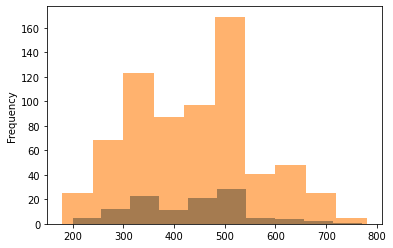

In [35]:
#paolo: yes! you can also see that the two distributions are partially overlapping
# and it makes sense that it is difficult to distinguish the two  means
water['Total'].plot.hist(); other['Total'].plot.hist(alpha=0.6);

Write your conclusion below.

In [36]:
# Your conclusions here:
# interpret outcome
#H0: 𝜇1=𝜇2 and H1: 𝜇1≠𝜇2

"""The p-value is higher than 0.05. So with 95% certainty, we cannot reject H0. This means that the 
means of the two samples are assumed equal. Total points of water and other (non water) pokemons do not have a 
statistical difference."""

'The p-value is higher than 0.05. So with 95% certainty, we cannot reject H0. This means that the \nmeans of the two samples are assumed equal. Total points of water and other (non water) pokemons do not have a \nstatistical difference.'

# Challenge 2 - Matched Pairs Test

In this challenge we will compare dependent samples of data describing our Pokemon. Our goal is to see whether there is a significant difference between each Pokemon's defense and attack scores. Our hypothesis is that the defense and attack scores are equal. In the cell below, import the `ttest_rel` function from `scipy.stats` and compare the two columns to see if there is a statistically significant difference between them.

In [37]:
# Your code here:
#H0: 𝜇𝑑=0 and H1: 𝜇𝑑≠0

#import libraries
from scipy.stats import ttest_rel

#perform test
ttest_rel(pokemon['Attack'], pokemon['Defense'])

Ttest_relResult(statistic=4.325566393330478, pvalue=1.7140303479358558e-05)

Describe the results of the test in the cell below.

In [38]:
# Your conclusions here:

"""The p-value is smaller than 0.05. So with 95% certainty, we can reject H0: The samples are likely to be different."""

'The p-value is smaller than 0.05. So with 95% certainty, we can reject H0: The samples are likely to be different.'

We are also curious about whether therer is a significant difference between the mean of special defense and the mean of special attack. Perform the hypothesis test in the cell below. 

In [39]:
# Your code here:

#perform test
ttest_rel(pokemon['Sp. Atk'], pokemon['Sp. Def'])

Ttest_relResult(statistic=0.853986188453353, pvalue=0.3933685997548122)

Describe the results of the test in the cell below.

In [40]:
# Your conclusions here:

"""The result is a p-value higher than 0.05. This means that the null hypothesis cannot be rejected. Therefore, the samples 
are not likely to be different."""

'The result is a p-value higher than 0.05. This means that the null hypothesis cannot be rejected. Therefore, the samples \nare not likely to be different.'

As you may recall, a two sample matched pairs test can also be expressed as a one sample test of the difference between the two dependent columns.

Import the `ttest_1samp` function and perform a one sample t-test of the difference between defense and attack. Test the hypothesis that the difference between the means is zero. Confirm that the results of the test are the same.

In [41]:
# Your code here:
#import library:
from scipy.stats import ttest_1samp

#create column with difference between defense and attack
pokemon['Difference'] = pokemon['Attack'] - pokemon['Defense']
pokemon['Difference']

#hypotheses
"""H0: 𝜇 = 0 and H1: 𝜇 ≠ 0"""

#compute the test
t, p = ttest_1samp(pokemon['Difference'], 0)
print(t)
print(p)

#interpret outcome
"""Since the p-value is lower than 0,05, we can reject the null hypothesis: 𝜇 = 0. So this is the same outcome as above."""

4.325566393330478
1.7140303479358558e-05


'Since the p-value is lower than 0,05, we can reject the null hypothesis: 𝜇 = 0. So this is the same outcome as above.'

# Bonus Challenge - The Chi-Square Test

The Chi-Square test is used to determine whether there is a statistically significant difference in frequencies. In other words, we are testing whether there is a relationship between categorical variables or rather when the variables are independent. This test is an alternative to Fisher's exact test and is used in scenarios where sample sizes are larger. However, with a large enough sample size, both tests produce similar results. Read more about the Chi Squared test [here](https://en.wikipedia.org/wiki/Chi-squared_test).

In the cell below, create a contingency table using `pd.crosstab` comparing whether a Pokemon is legenadary or not and whether the Type 1 of a Pokemon is water or not.

In [44]:
# Your code here:

#create additonal column type 1 = water or other
pokemon['Type'] = np.where(pokemon['Type 1']=='Water', 'Water', 'Other')
#check outcome
pokemon['Type'].value_counts()

#contingency table
observed = pd.crosstab(pokemon['Legendary'], pokemon['Type'])
observed

Type,Other,Water
Legendary,,
False,627,108
True,61,4


Perform a chi-squared test using the `chi2_contingency` function in `scipy.stats`. You can read the documentation of the function [here](https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.chi2_contingency.html).

In [48]:
# Your code here:
#import library
from scipy.stats import chi2_contingency

#perform test
chi2_contingency(observed)

(2.9429200762850503,
 0.08625467249550949,
 1,
 array([[632.1, 102.9],
        [ 55.9,   9.1]]))

Based on a 95% confidence, should we reject the null hypothesis?

In [49]:
# Your answer here:
"""Because the p-value is 0.086 and it is higher than 0.05, we cannot reject the 0 hypothesis. H0 = no statistical difference 
and this will then be considered right."""

'Because the p-value is 0.086 and it is higher than 0.05, we cannot reject the 0 hypothesis. H0 = no statistical difference \nand this will then be considered right.'

In [51]:
#paolo: yes very good work!
# as additional challenge you could try
# to visualize the distributions in the excercises  and couple the p values that you get 
# to how close or how far the distributions are from ach other 